In [52]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import operator

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

import pandas as pd
import numpy as np
import ast
import random
import math 
import time
import sys 

df = pd.read_csv('Caschool.csv', encoding='latin-1')

print("Sample Size:", len(df))
print("Test Score Mean:", df["testscr"].mean())
print("Test Score Median:",df["testscr"].median())
print("Test Score Std Dev:",df["testscr"].std())

print("Avginc Mean:", df["avginc"].mean())
print("Avginc Median:",df["avginc"].median())
print("Avginc Std Dev:",df["avginc"].std())



#np.array(df['avginc'])
x = np.array(df['avginc'])#df["avginc"]
y = np.array(df['testscr'])#df["testscr"]


# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

orgX = np.copy(x)
orgY = np.copy(y)

Sample Size: 420
Test Score Mean: 654.156548055013
Test Score Median: 654.4499816894536
Test Score Std Dev: 19.053347643618803
Avginc Mean: 15.316588053249177
Avginc Median: 13.7277998924255
Avginc Std Dev: 7.225889763291426


12.587489918452325
0.5625071539949729


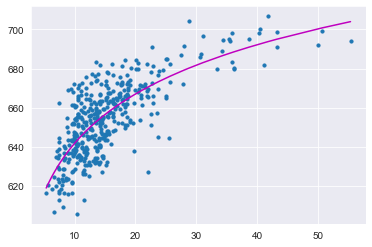

[557.83226986]
[[36.41968308]]


In [53]:
#y = np.log(y)
x = np.log(orgX)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print(rmse)
print(r2)

x =  np.copy(orgX)
plt.scatter(x, y, s=10)
# # sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.plot(x, y_pred, color='m')
plt.show()

print(model.intercept_)
print(model.coef_)


13.443700029268003
0.5009657985269464


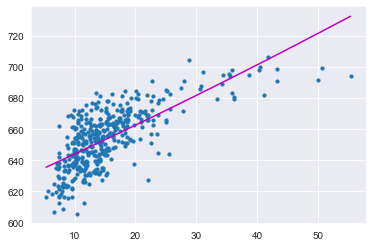

[6.43936233]
[[0.00284407]]


In [54]:
y = np.log(orgY)
x = orgX 
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
y_pred = np.exp(y_pred)

rmse = np.sqrt(mean_squared_error(orgY,y_pred))
r2 = r2_score(orgY,y_pred)
print(rmse)
print(r2)

x =  np.copy(orgX)
plt.scatter(x,  orgY, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.plot(x, y_pred, color='m')
plt.show()

print(model.intercept_)
print(model.coef_)

12.594609786755784
0.5620120954239216


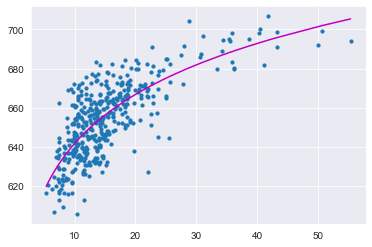

[6.3363494]
[[0.05541898]]


In [55]:
y = np.log(orgY)
x = np.log(orgX)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
y_pred = np.exp(y_pred)

rmse = np.sqrt(mean_squared_error(orgY,y_pred))
r2 = r2_score(orgY,y_pred)
print(rmse)
print(r2)

plt.scatter(orgX, orgY, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(orgX,y_pred), key=sort_axis)
orgX, y_pred = zip(*sorted_zip)
plt.plot(orgX, y_pred, color='m')
plt.show()

print(model.intercept_)
print(model.coef_)